In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [84]:
df=pd.read_csv("/content/ToyotaCorolla.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [85]:
df.shape

(1436, 11)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [87]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [88]:
df[df.duplicated()].shape

(1, 11)

In [89]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [90]:
df2=df.drop_duplicates(ignore_index=True)
df2

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [91]:
df2.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


In [92]:
label_encoder=LabelEncoder()
df2["Fuel_Type"]=label_encoder.fit_transform(df2["Fuel_Type"])

In [93]:
df2

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,7250,70,16916,2,86,0,1300,3,4,5,1015


In [94]:
numerical_cols=df2.select_dtypes(include=["float","int"]).columns

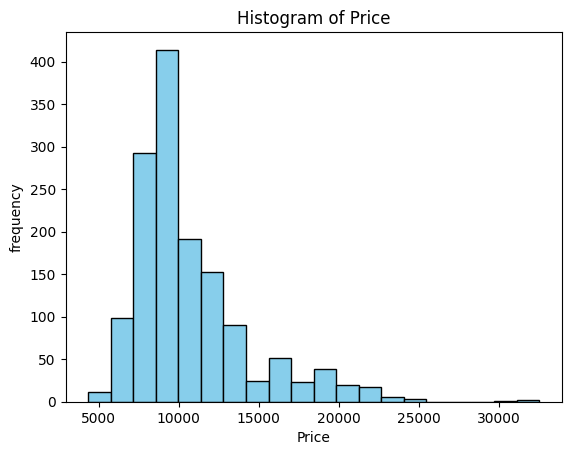

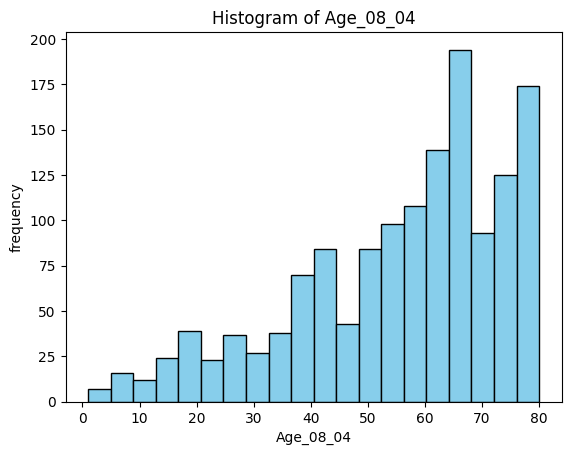

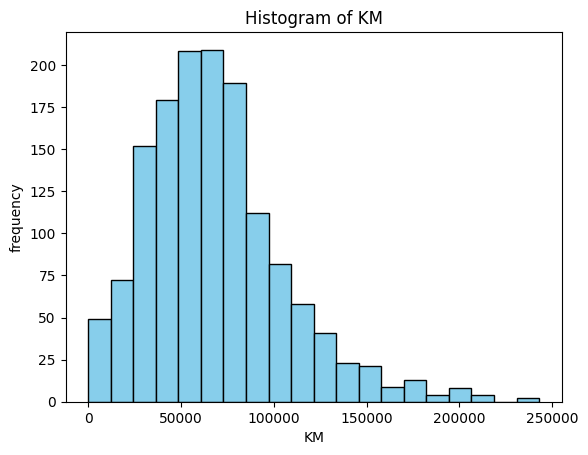

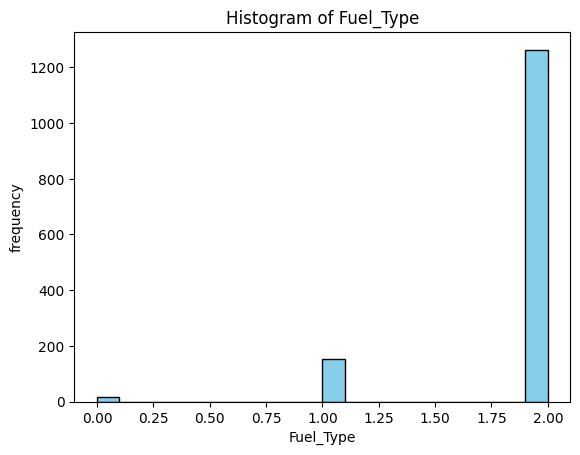

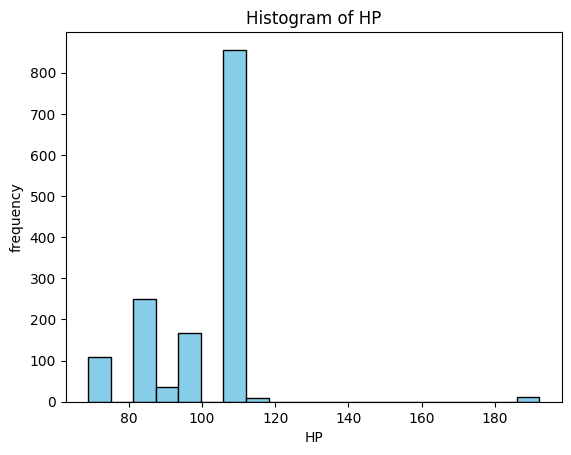

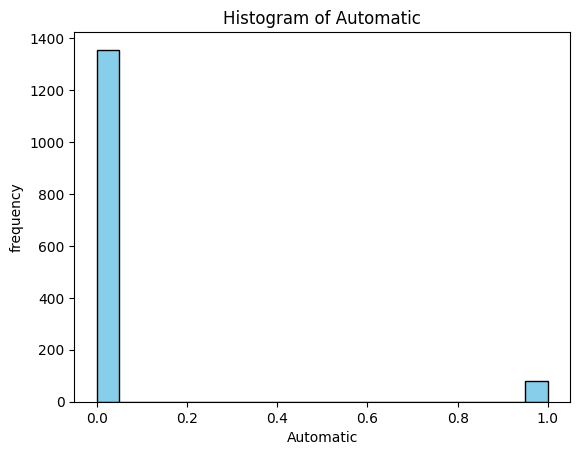

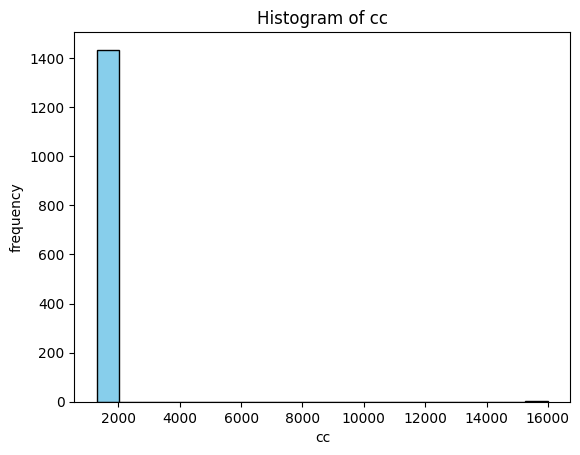

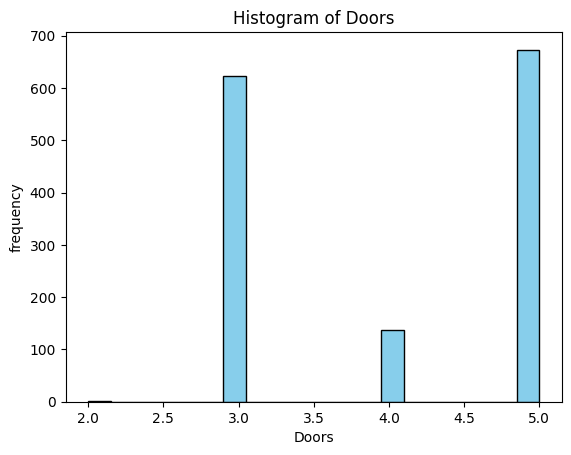

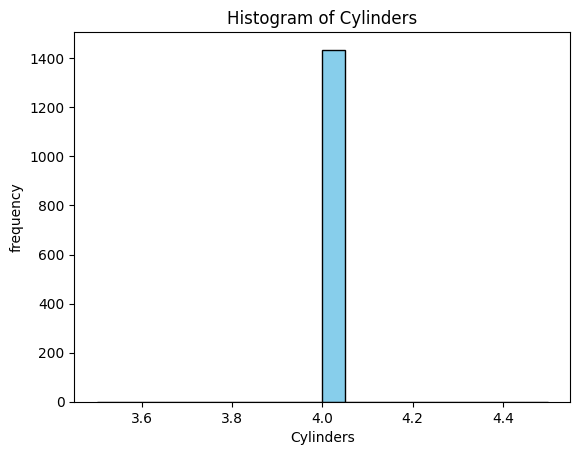

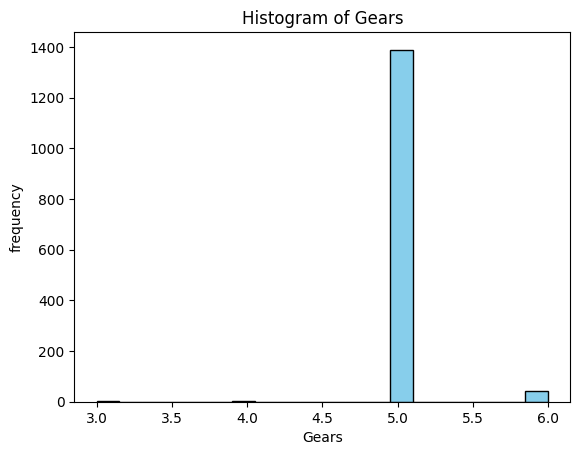

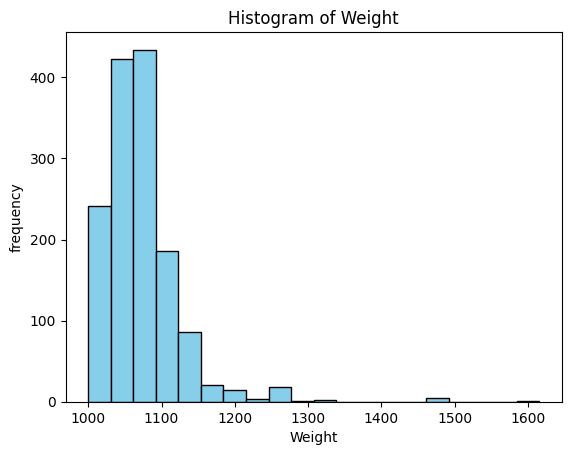

In [95]:
for column in numerical_cols:
    plt.hist(df2[column],bins=20,color="skyblue",edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("frequency")
    plt.show()

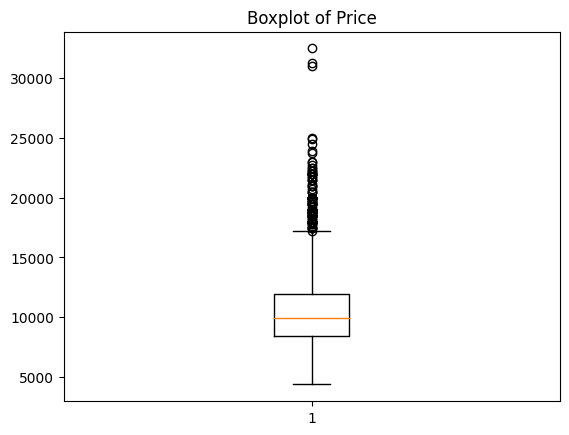

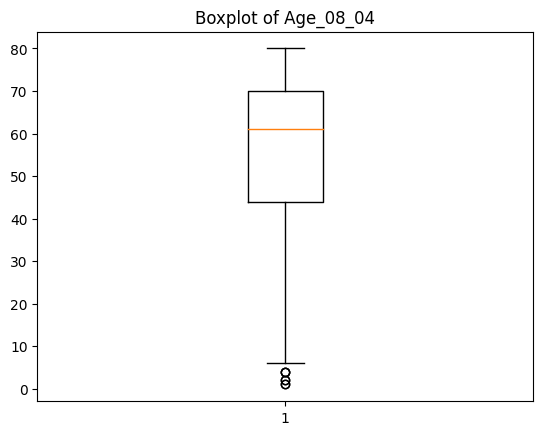

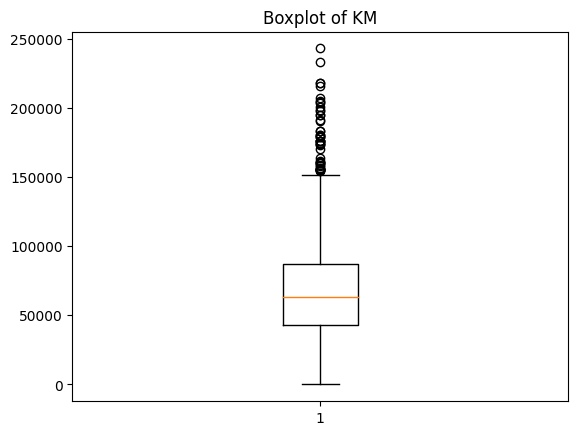

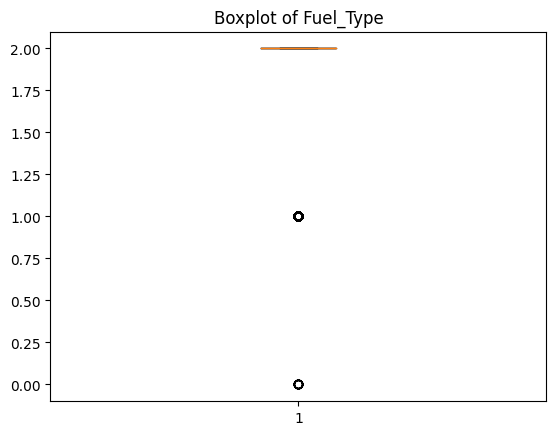

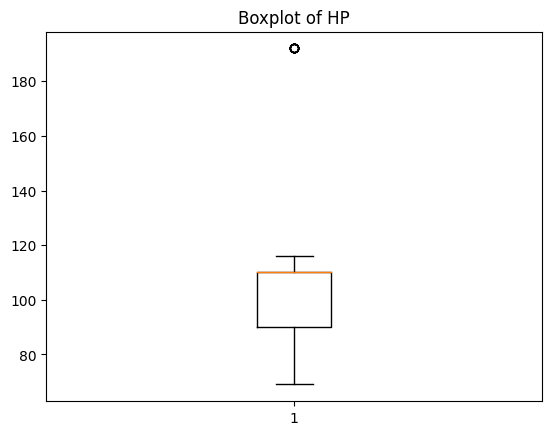

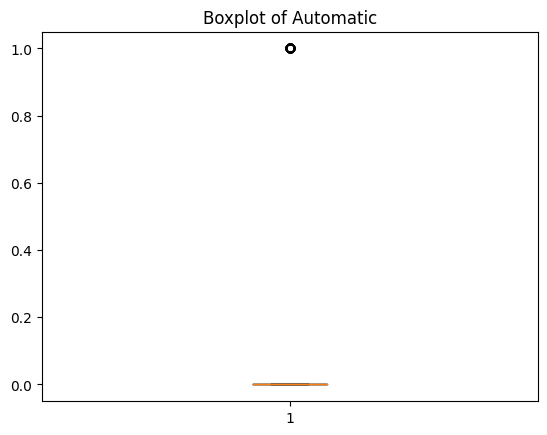

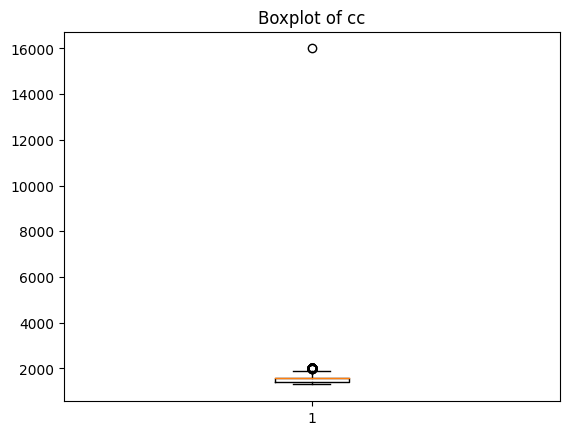

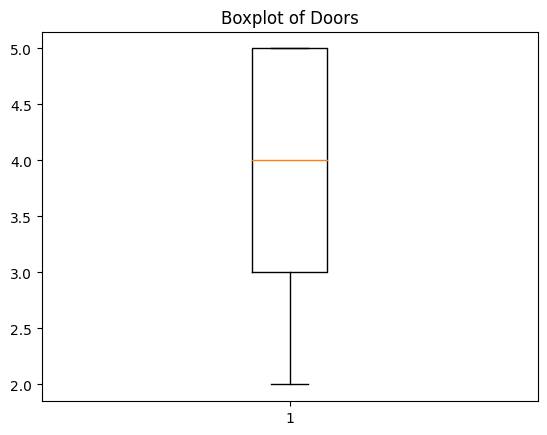

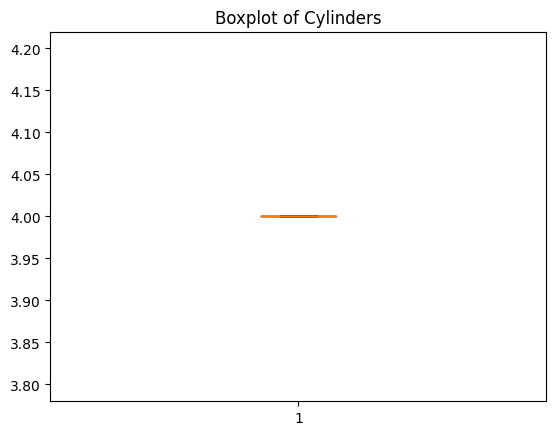

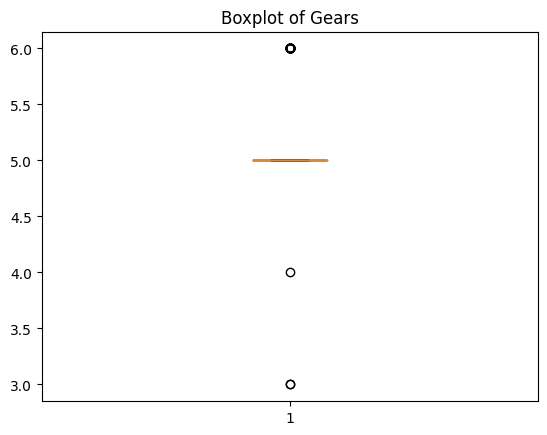

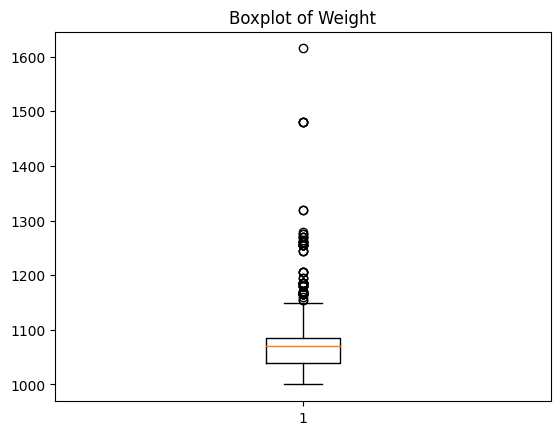

In [96]:
for column in numerical_cols:
    plt.boxplot(df2[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

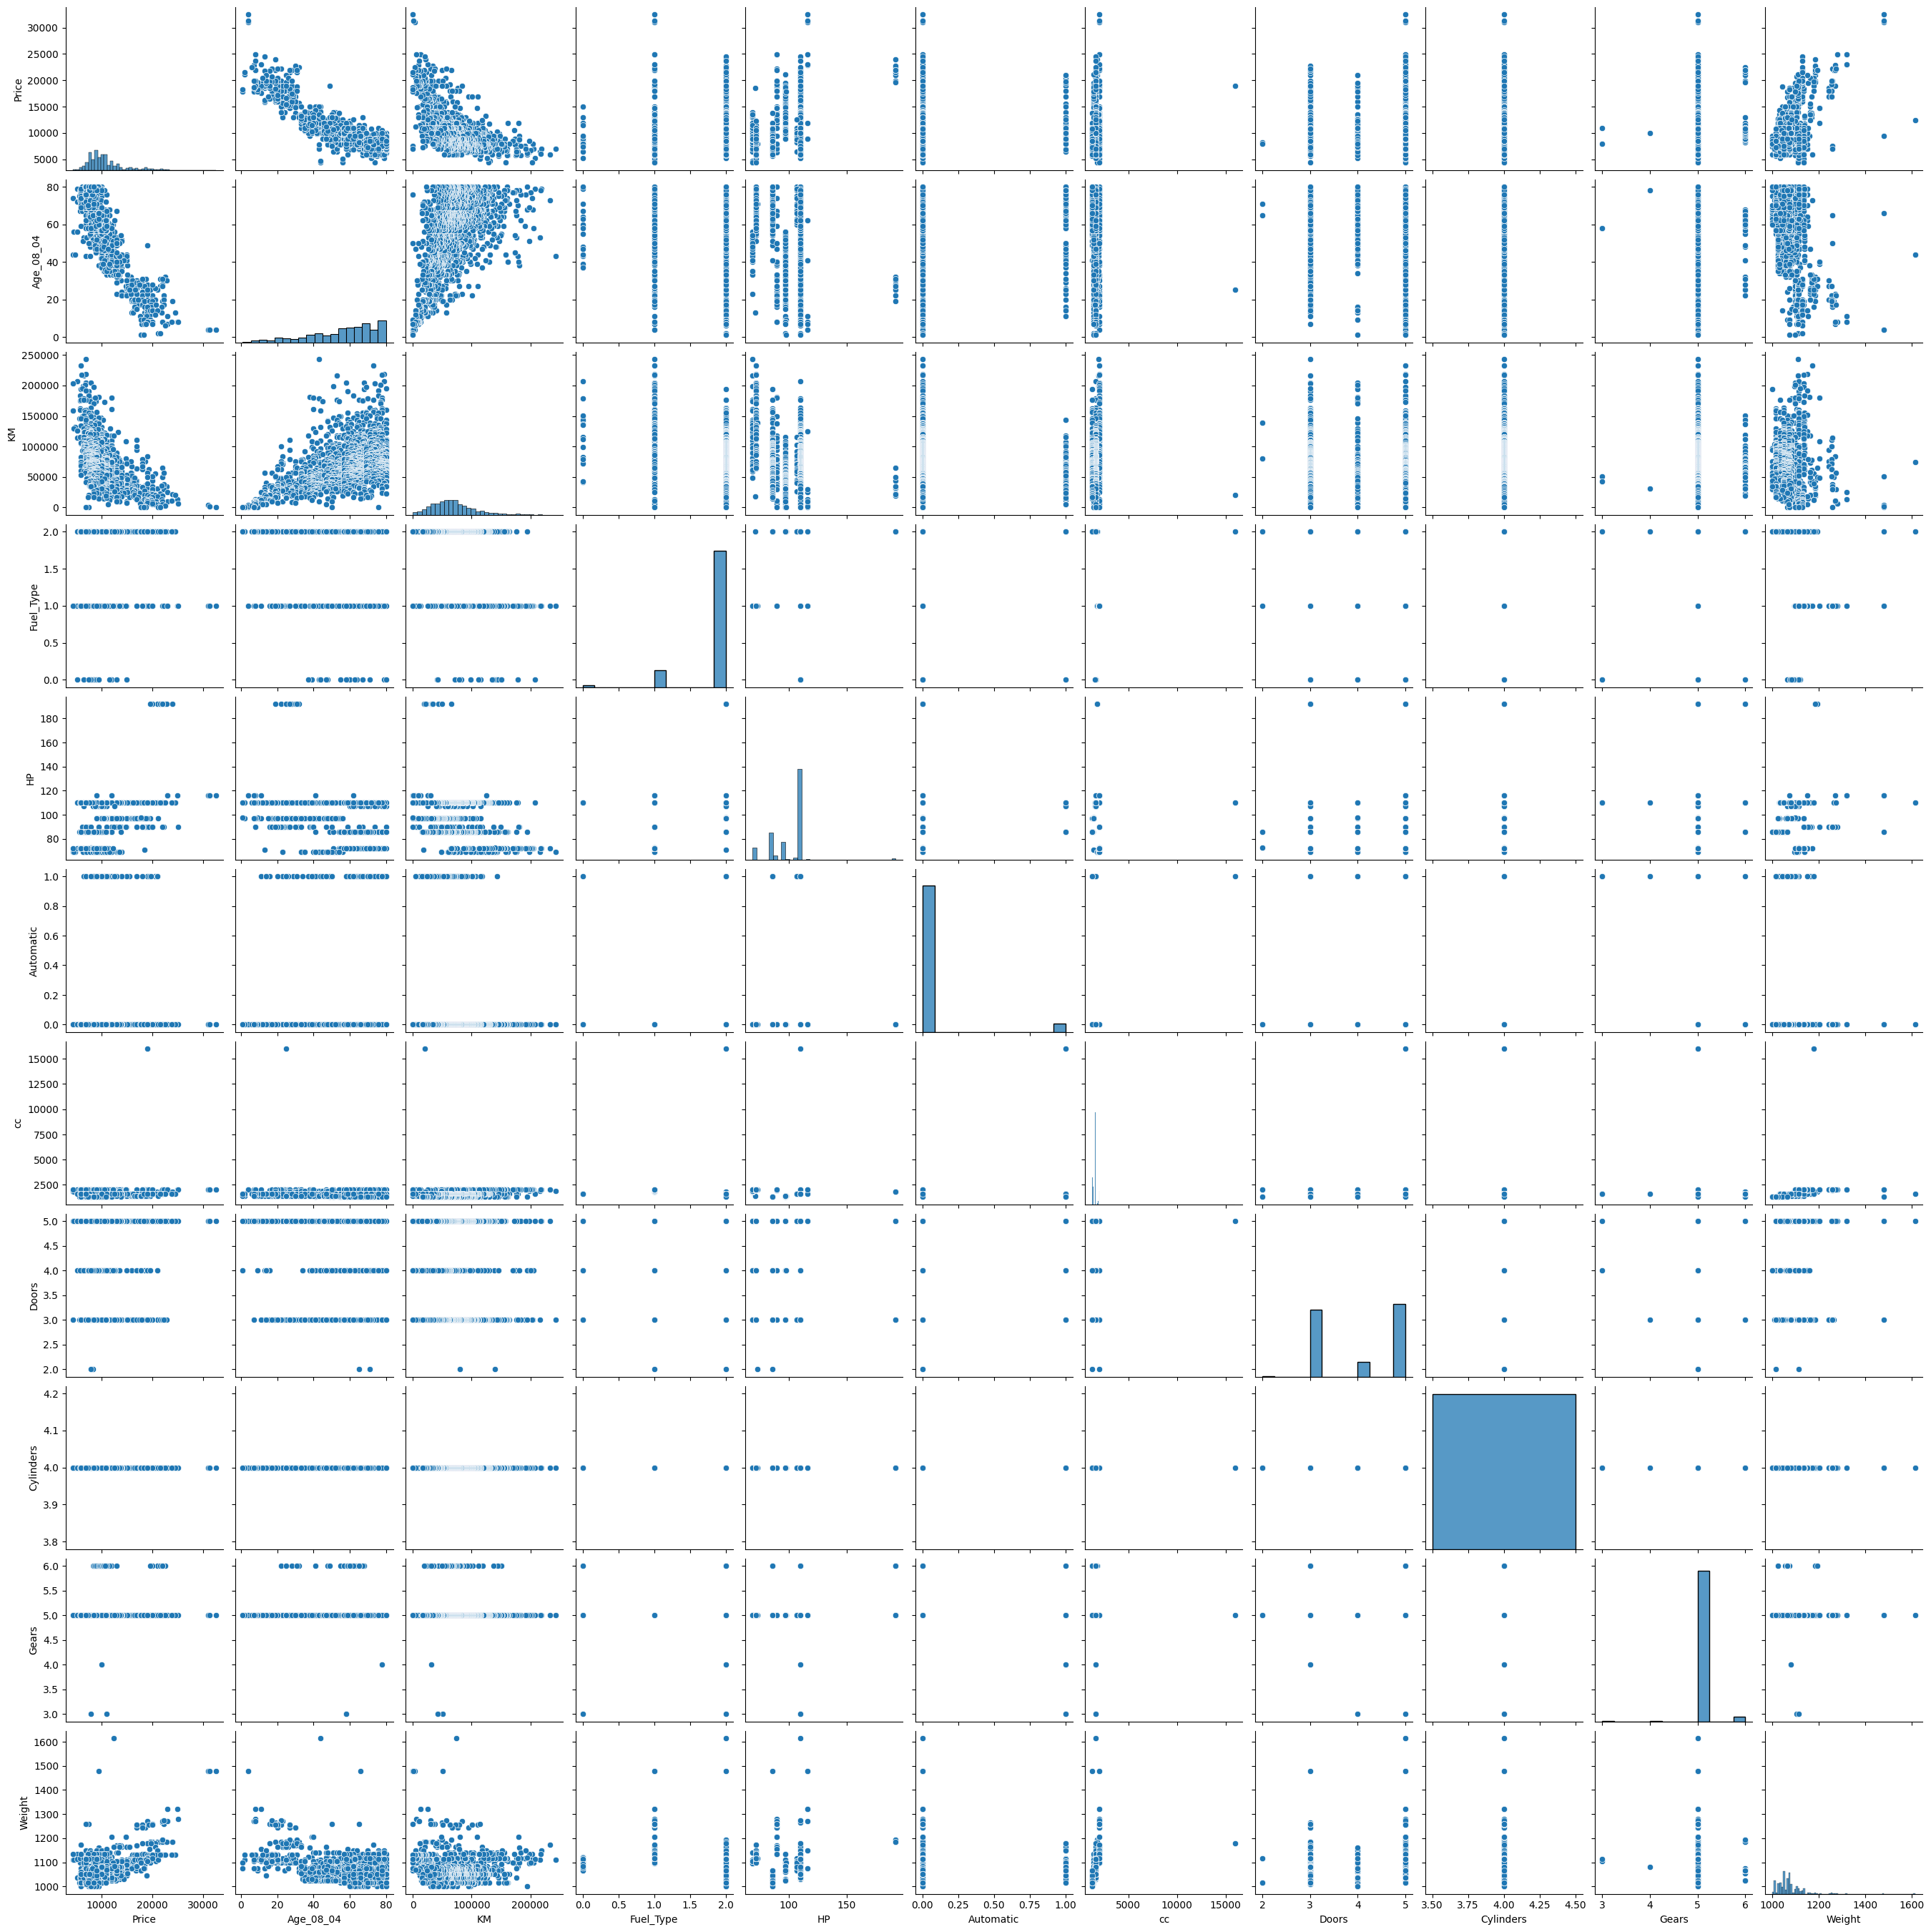

In [97]:
sns.pairplot(df2)
plt.show()

In [98]:
variance=df2.var()
variance

,0
Price,1.302295e+07
Age_08_04,3.445966e+02
KM,1.405582e+09
Fuel_Type,1.376360e-01
HP,2.244426e+02
Automatic,5.267787e-02
cc,1.801048e+05
Doors,9.075737e-01
Cylinders,0.000000e+00
Gears,3.556048e-02


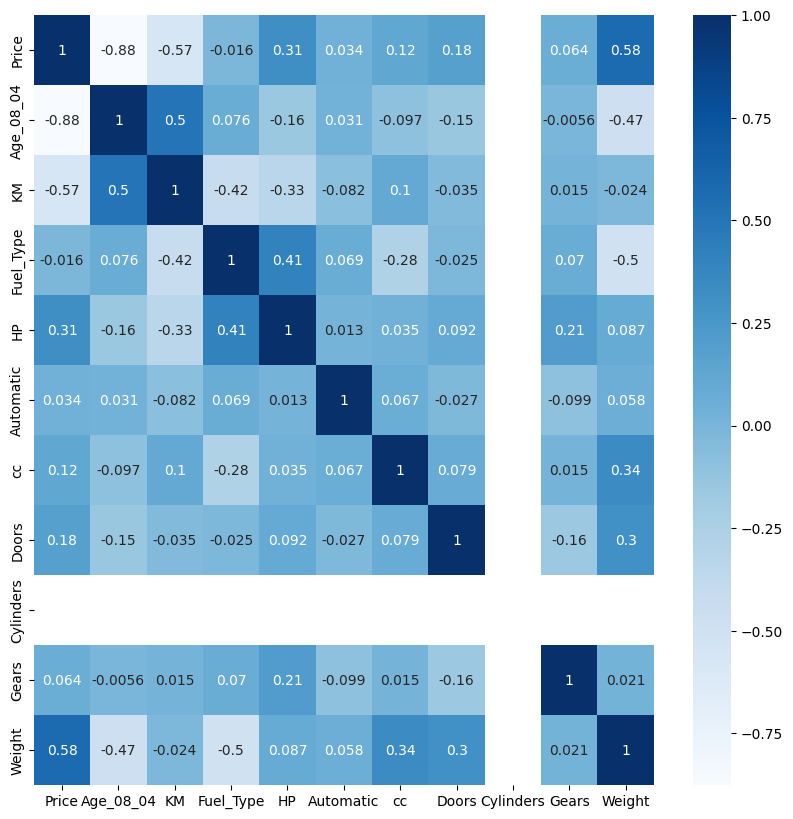

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,cmap="Blues")
plt.show()

In [100]:
#building the model
features=df2.drop("Price",axis=1)
target=df2[["Price"]]

In [101]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)


In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(287, 10)
(1148, 1)
(287, 1)


In [103]:
#create linear regression model
linear_model=LinearRegression()

In [104]:
#train the model
linear_model.fit(x_train,y_train)

LinearRegression()

In [105]:
#make the predictions on testing set
y_pred=linear_model.predict(x_test)
y_pred

array([[10771.2771743 ],
       [10336.13685636],
       [ 9300.14645287],
       [ 9383.27822615],
       [ 8435.76785895],
       [ 8445.30068545],
       [ 7936.52725684],
       [ 8286.94272138],
       [11767.14335883],
       [12375.17502016],
       [ 9479.95897656],
       [ 9353.10818538],
       [13188.73160423],
       [12233.66757083],
       [ 8967.21646198],
       [11552.49130967],
       [12313.21744619],
       [17508.98900451],
       [ 9955.97624331],
       [11465.13575011],
       [11490.36200939],
       [18077.25831313],
       [ 9819.07059707],
       [10397.12949576],
       [ 7419.22646204],
       [16012.96400703],
       [ 7106.33604153],
       [ 8333.42756975],
       [15617.83563246],
       [13859.06122019],
       [ 8182.55429566],
       [10474.07520907],
       [10113.64693143],
       [10140.65103679],
       [10035.58555088],
       [ 8641.96418298],
       [ 8828.64778893],
       [10006.4081339 ],
       [16328.91829034],
       [10681.62924074],


In [106]:
linear_model.score(x_train,y_train)

0.8694838434310366

In [107]:
linear_model.score(x_test,y_test)

0.832747199599305

In [108]:
linear_model.intercept_

array([-12491.86943335])

In [109]:
linear_model.coef_

array([[-1.21861473e+02, -1.68225953e-02,  8.47820421e+02,
         2.35867776e+01,  3.75454990e+02, -9.66412838e-02,
        -6.04109417e+01, -2.27373675e-13,  4.48000381e+02,
         2.36278733e+01]])

In [110]:
r2_score(y_test,y_pred)

0.832747199599305

<Axes: xlabel='Price'>

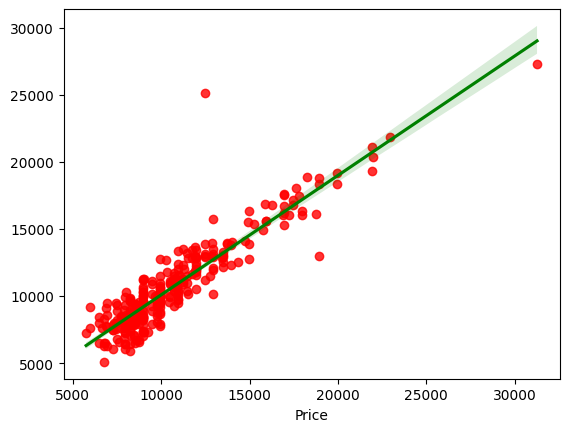

In [111]:
sns.regplot(x=y_test,y=y_pred,data=df2,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [112]:
#by using the model
import statsmodels.formula.api as smf
model1=smf.ols("Price~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Weight",data=df2).fit()


In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:50:28   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9852.8426   1478.988     -6.662      0.000   -1.28e+04   -6951.617
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
Fuel_Type    617.0386    145.592      4.238      0.000     331.441     902.637
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
model2=smf.ols("Price~cc",data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.29e-06
Time:                        14:50:28   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model3=smf.ols("Price~Doors",data=df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.40e-12
Time:                        14:50:28   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
model4=smf.ols("Price~cc+Doors",data=df2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           2.55e-15
Time:                        14:50:28   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
model4.resid.mean()

1.8967179263510354e-10

In [118]:
model4.resid_pearson

array([ 0.86893322,  0.93980501,  0.99650243, ..., -0.36201304,
       -0.71637196, -1.25685978])

<Axes: ylabel='Frequency'>

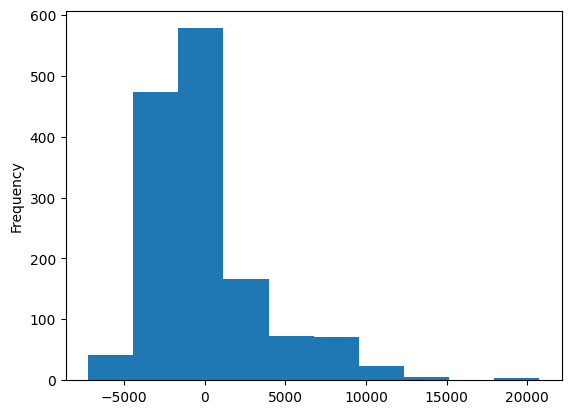

In [119]:
model4.resid.plot(kind="hist")

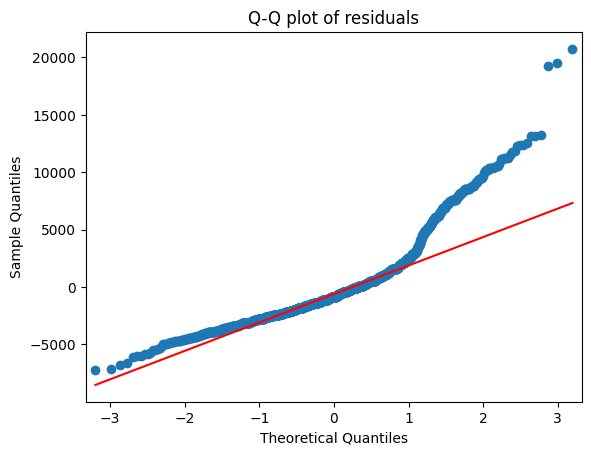

In [120]:
import statsmodels.api as sm
qqplot=sm.qqplot(model4.resid,line="q")
plt.title("Q-Q plot of residuals")
plt.show()

In [121]:
#Applying lasso and ridge methods


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score

In [123]:
lasso=Lasso(alpha=2)


In [124]:
lasso.fit(x_train,y_train)


Lasso(alpha=2)

In [125]:
y_pred1=lasso.predict(x_test)

In [126]:
y_pred1

array([10701.53579557, 10341.29928404,  9305.16967417,  9393.10863604,
        8437.68871735,  8441.79199061,  7943.50684844,  8295.62690782,
       11769.64188561, 12379.2513094 ,  9480.36454936,  9360.1564359 ,
       13193.90099147, 12239.83459667,  8975.4961555 , 11555.27218993,
       12315.57332114, 17509.67878273, 10127.9827976 , 11471.6664015 ,
       11495.51920944, 18074.93038397,  9827.64186755, 10402.73668992,
        7414.2161926 , 16015.71101373,  7106.34014543,  8339.26968939,
       15614.32113888, 13865.07044583,  8187.21415071, 10488.61150046,
       10118.53690908, 10145.75877103, 10046.27405817,  8644.48278886,
        8835.62659801, 10011.52807852, 16324.58842145, 10688.85528998,
        8759.71872018,  9550.76771241, 10106.83514272,  8548.38481543,
       10592.18063214, 17601.68489529, 10400.6003683 ,  9194.59924924,
       10697.75824011, 12523.42252268, 12858.17706217,  6286.65643944,
       14898.1153029 , 16325.3496378 ,  6052.28262521,  7799.31634348,
      

In [127]:
r2_score(y_test,y_pred1)

0.8330885332742228

In [128]:
lasso.intercept_


array([-11994.8667945])

In [129]:
lasso.coef_

array([-1.21751901e+02, -1.69548792e-02,  8.14523331e+02,  2.40348401e+01,
        3.34701955e+02, -9.66510411e-02, -5.95362392e+01,  0.00000000e+00,
        3.76146474e+02,  2.35182518e+01])

In [130]:
params={"alpha":[1,2,3,4,5,6,7]}

In [131]:
grid_search=GridSearchCV(lasso,params)

In [132]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=2),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7]})

In [133]:
grid_search.best_params_

{'alpha': 1}

In [134]:
lasso1=Lasso(alpha=1)

In [135]:
lasso1.fit(x_train,y_train)

Lasso(alpha=1)

In [136]:
y_pred2=lasso1.predict(x_test)

In [137]:
y_pred2

array([10736.406483  , 10338.71806684,  9302.65806609,  9388.19342051,
        8436.72828143,  8443.54633057,  7940.01704972,  8291.28480078,
       11768.39263264, 12377.21317582,  9480.16175451,  9356.63230092,
       13191.31630658, 12236.75109159,  8971.35629569, 11553.88175143,
       12314.39538905, 17509.33389584, 10041.97956352, 11468.40107993,
       11492.94062501, 18076.09435968,  9823.35622252, 10399.93309358,
        7416.72132474, 16014.33751448,  7106.33808334,  8336.34862955,
       15616.07838783, 13862.06583619,  8184.88421392, 10481.34335533,
       10116.09191874, 10143.2049024 , 10040.92979564,  8643.22347865,
        8832.13719625, 10008.96810411, 16326.75336209, 10685.24226352,
        8763.53497567,  9547.3564521 , 10139.78780886,  8545.7054253 ,
       10588.62071061, 17602.67974055, 10420.71015255,  9211.63067986,
       10692.77127768, 12516.85836579, 12856.47164297,  6286.14109378,
       14901.60702031, 16324.31045844,  6055.8600771 ,  7793.84144314,
      

In [138]:
r2_score(y_test,y_pred2)

0.8329274236492012

In [139]:
lasso1.coef_

array([-1.21806688e+02, -1.68887372e-02,  8.31171849e+02,  2.38108091e+01,
        3.55078484e+02, -9.66461592e-02, -5.99735870e+01,  0.00000000e+00,
        4.12073430e+02,  2.35730623e+01])

In [140]:
#Applying ridge model


In [141]:
ridge=Ridge()

In [142]:
params={"alpha":[1,2,3,4]}

In [143]:
Grid_cv=GridSearchCV(ridge,params)

In [144]:
Grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4]})

In [145]:
Grid_cv.best_params_

{'alpha': 1}

In [146]:
ridge=Ridge(alpha=1)

In [147]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [148]:
y_pred3=ridge.predict(x_test)
y_pred3

array([[10757.29746051],
       [10336.56076961],
       [ 9301.90897185],
       [ 9385.85880798],
       [ 8436.35095996],
       [ 8443.2300493 ],
       [ 7938.65820345],
       [ 8289.02698337],
       [11768.11897777],
       [12376.72584878],
       [ 9478.55340439],
       [ 9354.72854671],
       [13189.49954193],
       [12235.8671254 ],
       [ 8968.46887065],
       [11552.60497631],
       [12313.28694594],
       [17508.42515202],
       [10003.41590094],
       [11467.3589932 ],
       [11491.72028327],
       [18075.81940445],
       [ 9820.51791498],
       [10398.93074138],
       [ 7416.76711472],
       [16012.7328601 ],
       [ 7105.43575829],
       [ 8335.76266408],
       [15615.72422936],
       [13859.96454834],
       [ 8183.34471894],
       [10478.7919695 ],
       [10114.02821548],
       [10141.81868942],
       [10038.51750928],
       [ 8641.34331218],
       [ 8830.25096162],
       [10007.56358877],
       [16326.63247969],
       [10683.53617815],


In [149]:
r2_score(y_test,y_pred3)

0.8328931755571491

In [150]:
ridge.coef_

array([[-1.21841188e+02, -1.68667297e-02,  8.35057130e+02,
         2.37313632e+01,  3.69915566e+02, -9.70470893e-02,
        -6.03550240e+01,  0.00000000e+00,  4.33997125e+02,
         2.35816460e+01]])

***SUMMARY:***
1.In the given dataset we have 1 Target variable and 10 independent variables



2.There is no null values in the given dataset




3.1 duplicate record is there droping that record and reseting the index



4.finding the correlation on numerical columns and using heat map



5.using the label encoder transforming the categorical column to numerical column



6.using the boxplots and histograms clearly we can observe the are some outliers



7.by visualization we can also observe that there is no varity of information in cylinder column



8.Buliding the MLR model using statsmodel by OLS method we can clearly observe that CC and Doors are not significant



9.when we are checking individually and both at combinedly there are significant



10.finding the residuals



11.using regularization we are preventing model from overfitting



12.finding R2 score and predicting.

In [151]:
#what is Standardization and Normalization and how is it helpful?

**Standardization**:It is a data preprocessing technique used in a machine learning to transform numerical Features to have ***mean of Zero*** and ***standared deviation of one ***
It helps in improve algorithm performance,Prevents features with larger scales from dominating,Better interpretation of coefficients,improves model performance.
FORMULA:z = (x - mean) / standard deviation

**Normalization:**It is a data preprocessing technique used oin machine learning to transform numerical Features to have **fixed range between 0 and 1.**
It helps in improve algorithm performance,Prevents features with larger scales from dominating,Better interpretation of coefficients,improves model performance.
FORMULA:z = (x - min) / (max - min)

In [152]:
#What techniques can be used to address multicollinearity in multiple linear regression?


1.Variance Inflation Factor


2.Regularization Techiniques like
Ridge,Lasso,ElasticNet



3.Principle component analysis











